In [1]:
api_NewsAPI = "24723a0894f94deea8cf83a9efaca4d8"

In [2]:
# basis stuff
import requests
import datetime as dt
import pandas as pd
import seaborn as sea
from pprint import pprint
from newsapi import NewsApiClient
import math

# für die wordcloud usw.
import numpy
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [3]:
#pip install newsapi-python

In [4]:
apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")

In [5]:
# automatisieren des scrapings von newsapi mittels einer funktion
def scraper_newsapi(domain, sorting, page):
    # apicode eingeben
    apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")
    # get_everything für die parameter der funktion
    data = apicode.get_everything(domains=f"{domain}", sort_by=f"{sorting}", page=page, page_size=100)
    # aus dem ergebnis (data): herausziehen von den artikeln und kopieren in eigenes objekt
    articles = data['articles'].copy()
    # einen pd.DataFrame aus articles machen, datum mit to_datetime als solches kennzeichnen und alles ausgeben lassen
    df = pd.DataFrame(articles)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    return df

In [6]:
foxnews_base = scraper_newsapi(domain="foxnews.com", sorting="publishedAt", page=1)
foxnews_base

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,Triathlete rides out the pandemic on her way t...,Australian triathlete Ashleigh Gentle had just...,https://www.foxnews.com/sports/triathlete-ride...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:48:52+00:00,Australian triathlete Ashleigh Gentle had just...
1,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,"Miller hits 3 HRs, Phillies rout reeling Cubs 8-0",Brad Miller hit three home runs in a game for ...,https://www.foxnews.com/sports/miller-hits-3-h...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:44:54+00:00,Brad Miller hit three home runs in a game for ...
2,"{'id': 'fox-news', 'name': 'Fox News'}",Sam Dorman,San Francisco Gay Men's Choir faces backlash f...,The San Francisco Gay Men's Choir faced a wave...,https://www.foxnews.com/us/gay-choir-your-chil...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:41:04+00:00,The San Francisco Gay Men's Choir faced a wave...
3,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,"García HR in 8th, Brewers beat Reds to boost N...","Avisaíl García hit a tiebreaking, two-run home...",https://www.foxnews.com/sports/garcia-hr-in-8t...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:39:59+00:00,"Avisaíl García hit a tiebreaking, two-run home..."
4,"{'id': 'fox-news', 'name': 'Fox News'}",Brie Stimson,Gavin Newsom asks Californians to voluntarily ...,California Gov. Gavin Newsom asked residents o...,https://www.foxnews.com/politics/gavin-newsom-...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:37:59+00:00,California Gov. Gavin Newsom asked residents o...
...,...,...,...,...,...,...,...,...
95,"{'id': 'fox-news', 'name': 'Fox News'}",Jessica Napoli,Christina Haack addresses new relationship wit...,The interior designer finalized her divorce fr...,https://www.foxnews.com/entertainment/christin...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:58:22+00:00,Christina Haack is addressing her new relation...
96,"{'id': 'fox-news', 'name': 'Fox News'}",Lindsay Kornick,Twitter mocks CNBC article 'The upside to infl...,CNBC published an article which appeared to ce...,https://www.foxnews.com/media/twitter-mocks-cn...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:50:28+00:00,CNBC published an article which appeared to ce...
97,"{'id': 'fox-news', 'name': 'Fox News'}",Charles Creitz,Gen. Keane: Biden wrong on no 'Mission: Accomp...,"Gen. Jack Keane, Ret., chairman of the Institu...",https://www.foxnews.com/media/gen-keane-biden-...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:32:22+00:00,"Retired Gen. Jack Keane, chairman of the Insti..."
98,"{'id': 'fox-news', 'name': 'Fox News'}",Lauryn Overhultz,Arnold Schwarzenegger's son Christopher shows ...,Arnold Schwarzenegger's son Christopher steppe...,https://www.foxnews.com/entertainment/christop...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:32:01+00:00,Photographers captured Christopher Schwarzeneg...


In [7]:
print(foxnews_base.dtypes)

source                      object
author                      object
title                       object
description                 object
url                         object
urlToImage                  object
publishedAt    datetime64[ns, UTC]
content                     object
dtype: object


In [8]:
#nyt_data = apicode.get_everything(domains="nytimes.com", sort_by="publishedAt", page=1, page_size=100)
#artikel = nyt_data['articles'].copy()
#pddf = pd.DataFrame(artikel)
#pddf

## mit dem newsapi package kann man direkt über eine methode zugreifen und muss nicht über requests anfragen schreiben!

In [9]:
## problematik mit paginationen: man bekommt (z. B.) ca. 3000 artikel raus, aber mehr zeigt einem der dev account
## nicht mehr an... Versuchen wirs nochmal

pages = math.ceil(nyt_data['totalResults']/100)

for p in range(2, pages):
    data = apicode.get_everything(domains="nytimes.com", sort_by="publishedAt", page=p, page_size=100)
    results.extend(data['articles'])
    
    ## OK klappt nicht...

NameError: name 'nyt_data' is not defined

In [10]:
# rein aus neugier: kann ich mit meiner scraperfunktion einfach die seite 2 ansteuern?

scraper_newsapi(domain="foxnews", sorting="publishedAt", page=2)

## auch das geht leider nicht. somit steht fest, dass man mittels newsapi und dem kostenfreien dev-account maximal
## die ersten 100 nachrichten ziehen kann, bevor man in einen "paid plan" wechseln müsste!

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}

In [11]:
## vorbereitungsfunktion: sätze splitten
def vorbereitung_dfs(i, a):
    # nas rausschmeißen
    i[f'{a}'].dropna(inplace=True)
    
    # alles in kleinbuchstaben umwandeln
    i[f'{a}'] = [entry.lower() for entry in i[a]]
    
    # tokenization: erstellen einzelner worte
    i[f'{a}'] = [word_tokenize(entry) for entry in i[a]]
    
    return i

In [12]:
## testen der überführung meiner lemmatization words funktion
def newcol_lemmawords(i):    
    # shenanigans welches für NLP gebraucht wird, damit wörter richtig erkannt werden
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    
    for index,entry in enumerate(i["description"]):
    # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
    # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    e = i
    e.loc[index,'text_final'] = str(Final_words)
    return e

In [13]:
def lemmawords(i, a):
    # shenanigans welches für NLP gebraucht wird, damit wörter richtig erkannt werden
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    
    for index,entry in enumerate(i["description"]):
    # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
    # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    return Final_words

In [14]:
foxnews_vorbereitet = vorbereitung_dfs(foxnews_base, "description")

In [15]:
# shenanigans welches für NLP gebraucht wird, damit wörter richtig erkannt werden
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
    
for index,entry in enumerate(foxnews_vorbereitet["description"]):
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    foxnews_vorbereitet.loc[index,'text_final'] = str(Final_words)

In [16]:
foxnews_vorbereitet

,source,author,title,description,url,urlToImage,publishedAt,content,text_final
0,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,Triathlete rides out the pandemic on her way t...,"[australian, triathlete, ashleigh, gentle, had...",https://www.foxnews.com/sports/triathlete-ride...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:48:52+00:00,Australian triathlete Ashleigh Gentle had just...,"['australian', 'triathlete', 'ashleigh', 'gent..."
1,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,"Miller hits 3 HRs, Phillies rout reeling Cubs 8-0","[brad, miller, hit, three, home, runs, in, a, ...",https://www.foxnews.com/sports/miller-hits-3-h...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:44:54+00:00,Brad Miller hit three home runs in a game for ...,"['brad', 'miller', 'hit', 'three', 'home', 'ru..."
2,"{'id': 'fox-news', 'name': 'Fox News'}",Sam Dorman,San Francisco Gay Men's Choir faces backlash f...,"[the, san, francisco, gay, men, 's, choir, fac...",https://www.foxnews.com/us/gay-choir-your-chil...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:41:04+00:00,The San Francisco Gay Men's Choir faced a wave...,"['san', 'francisco', 'gay', 'men', 'choir', 'f..."
3,"{'id': 'fox-news', 'name': 'Fox News'}",Associated Press,"García HR in 8th, Brewers beat Reds to boost N...","[avisaíl, garcía, hit, a, tiebreaking, ,, two-...",https://www.foxnews.com/sports/garcia-hr-in-8t...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:39:59+00:00,"Avisaíl García hit a tiebreaking, two-run home...","['avisaíl', 'garcía', 'hit', 'tiebreaking', 'h..."
4,"{'id': 'fox-news', 'name': 'Fox News'}",Brie Stimson,Gavin Newsom asks Californians to voluntarily ...,"[california, gov, ., gavin, newsom, asked, res...",https://www.foxnews.com/politics/gavin-newsom-...,https://static.foxnews.com/foxnews.com/content...,2021-07-09 10:37:59+00:00,California Gov. Gavin Newsom asked residents o...,"['california', 'gov', 'gavin', 'newsom', 'ask'..."
...,...,...,...,...,...,...,...,...,...
95,"{'id': 'fox-news', 'name': 'Fox News'}",Jessica Napoli,Christina Haack addresses new relationship wit...,"[the, interior, designer, finalized, her, divo...",https://www.foxnews.com/entertainment/christin...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:58:22+00:00,Christina Haack is addressing her new relation...,"['interior', 'designer', 'finalize', 'divorce'..."
96,"{'id': 'fox-news', 'name': 'Fox News'}",Lindsay Kornick,Twitter mocks CNBC article 'The upside to infl...,"[cnbc, published, an, article, which, appeared...",https://www.foxnews.com/media/twitter-mocks-cn...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:50:28+00:00,CNBC published an article which appeared to ce...,"['cnbc', 'publish', 'article', 'appear', 'cele..."
97,"{'id': 'fox-news', 'name': 'Fox News'}",Charles Creitz,Gen. Keane: Biden wrong on no 'Mission: Accomp...,"[gen., jack, keane, ,, ret., ,, chairman, of, ...",https://www.foxnews.com/media/gen-keane-biden-...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:32:22+00:00,"Retired Gen. Jack Keane, chairman of the Insti...","['jack', 'keane', 'chairman', 'institute', 'st..."
98,"{'id': 'fox-news', 'name': 'Fox News'}",Lauryn Overhultz,Arnold Schwarzenegger's son Christopher shows ...,"[arnold, schwarzenegger, 's, son, christopher,...",https://www.foxnews.com/entertainment/christop...,https://static.foxnews.com/foxnews.com/content...,2021-07-08 20:32:01+00:00,Photographers captured Christopher Schwarzeneg...,"['arnold', 'schwarzenegger', 'son', 'christoph..."


In [17]:
nytimes_base = scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=1)

In [18]:
nytimes_vorbereitet = vorbereitung_dfs(nytimes_base, "description")

In [19]:
# wn (wordnet): funktion zur lemmatization der wörter; hat als default nomen
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
    
# forloop: für jeden eintrag in aufgelisteter spalte "description" des vorbereiteten pd.DataFrame
for index,entry in enumerate(nytimes_vorbereitet["description"]):
    # leere liste erstellen
    Final_words = []
    # die lemmatization-funktion als objekt sichern
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag ("parts of speech") aus dem nlp-package nltk: das wird für jeden eintrag festlegen, welche wortart es ist
    for word, tag in pos_tag(entry):
        # prüfung für stopwords (also z. B. "by", "the", usw.) und ob es sich um ein wirkliches wort handelt (isalpha checkt
        # auf buchstaben). wenn abgeschlossen, wird dieses objekt an die leere liste geklebt
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # die leere liste wird an den datensatz als neue column geklebt
    nytimes_neue = nytimes_vorbereitet
    nytimes_neue.loc[index,'text_final'] = str(Final_words)
    
## diese funktionen zur lemmatization habe ich mir von auswärts geholt, so transparent muss ich sein,
## da ich bisher keine erfahrung mit nlp habe/hatte. ich habe aber, wie den kommentaren zu entnehmen ist, 
## nachvollzogen, wie die funktionen arbeiten. in dem artikel wurde das dann eingesetzt, um ein machine learning modell zu
## bauen um artikel zu kategorisieren. da mir das zu abgehoben erschien und ich das noch nie gemacht habe und auch die 
## algorithmen dahinter in der kurzen zeit nicht verstehen konnte, habe ich davon abgesehen und mich für eine wordcloud
## entschieden.

In [20]:
nytimes_neue

,source,author,title,description,url,urlToImage,publishedAt,content,text_final
0,"{'id': None, 'name': 'New York Times'}",Alan Rappeport,I.M.F. Board Backs $650 Billion Aid Plan to He...,"[the, expansion, of, emergency, reserves, to, ...",https://www.nytimes.com/2021/07/09/us/politics...,https://static01.nyt.com/images/2021/07/09/us/...,2021-07-09 10:58:56+00:00,"VENICE, Italy The International Monetary Fund ...","['expansion', 'emergency', 'reserve', 'fund', ..."
1,"{'id': None, 'name': 'New York Times'}",Michael J. de la Merced,How Much Longer Can Martin Shkreli Control a P...,"[a, group, of, shareholders, has, set, up, a, ...",https://www.nytimes.com/2021/07/09/business/de...,https://static01.nyt.com/images/2021/07/09/bus...,2021-07-09 10:58:36+00:00,"Since moving to the low-security prison, in Al...","['group', 'shareholder', 'set', 'showdown', 'm..."
2,"{'id': None, 'name': 'New York Times'}",David Leonhardt,Biden’s New Push,"[the, u.s., economy, suffers, from, a, lack, o...",https://www.nytimes.com/2021/07/09/briefing/us...,https://static01.nyt.com/images/2021/07/09/len...,2021-07-09 10:31:49+00:00,As word began spreading this week that Biden w...,"['economy', 'suffers', 'lack', 'competition', ..."
3,"{'id': None, 'name': 'New York Times'}",Elian Peltier and Marc Santora,Violence is a threat Haitians know. Covid is s...,"[a, shifting, political, crisis, after, the, a...",https://www.nytimes.com/2021/07/09/world/ameri...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 10:14:31+00:00,But even before the assassination of President...,"['shifting', 'political', 'crisis', 'assassina..."
4,"{'id': None, 'name': 'New York Times'}",Kalee Thompson,Why We Love the Micro Maxi Deluxe Scooter,"[spotting, my, kid, gliding, down, the, sidewa...",https://www.nytimes.com/wirecutter/reviews/mic...,https://cdn.thewirecutter.com/wp-content/media...,2021-07-09 10:00:58+00:00,"The three-wheeled Micro Maxi Deluxe, a lean-to...","['spot', 'kid', 'glide', 'sidewalk', 'micro', ..."
...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'New York Times'}",Ben Rothenberg,Why Denis Shapovalov Is Having a Wimbeldon to ...,"[<, ol, >, <, li, >, why, denis, shapovalov, i...",https://www.nytimes.com/2021/07/08/sports/tenn...,https://static01.nyt.com/images/2021/07/08/spo...,2021-07-08 17:41:09+00:00,"There have been, as Bautista Agut hinted, less...","['ol', 'li', 'denis', 'shapovalov', 'wimbeldon..."
96,"{'id': None, 'name': 'New York Times'}",Reed Abelson,Social Isolation in U.S. Rose as Crisis Began ...,"[the, findings, suggest, recovery, from, the, ...",https://www.nytimes.com/2021/07/08/health/coro...,https://static01.nyt.com/images/2021/07/08/us/...,2021-07-08 17:33:08+00:00,The findings suggest recovery from the pandemi...,"['finding', 'suggest', 'recovery', 'pandemic',..."
97,"{'id': None, 'name': 'New York Times'}",James Poniewozik,Review: ‘The White Lotus’ Offers Scenery From ...,"[mike, white, ’, s, one-percenter, satire, for...",https://www.nytimes.com/2021/07/08/arts/televi...,https://static01.nyt.com/images/2021/07/08/art...,2021-07-08 16:40:36+00:00,"As the resort manager, Armond (Murray Bartlett...","['mike', 'white', 'satire', 'hbo', 'tale', 'mo..."
98,"{'id': None, 'name': 'New York Times'}",Shira Ovide,"A New Digital Life, Same Old Problems","[despite, our, hopes, ,, the, internet, hasn, ...",https://www.nytimes.com/2021/07/08/technology/...,https://static01.nyt.com/images/2021/07/08/bus...,2021-07-08 16:39:42+00:00,This article is part of the On Tech newsletter...,"['despite', 'hope', 'internet', 'erase', 'pres..."


In [24]:
nytimes_neue['text_final'] = nytimes_neue['text_final'].str.strip('[]')
nytimes_neue.to_csv("nytimes_neue_test.csv", encoding = "UTF-8")

In [25]:
#pip install wordcloud

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
def fun_wordcloud(wort):
    wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=110).generate(wort)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [28]:
def passend(series, i):
    leereliste = []
    
    for i in series[int(i)+1]:
        leereliste.append(series[i])
    return leereliste

In [29]:
passend(fullcontent, 0)

NameError: name 'fullcontent' is not defined

In [30]:
fullcontent = nytimes_neue["text_final"][0:60]
fullcontent

0     'expansion', 'emergency', 'reserve', 'fund', '...
1     'group', 'shareholder', 'set', 'showdown', 'ma...
2     'economy', 'suffers', 'lack', 'competition', '...
3     'shifting', 'political', 'crisis', 'assassinat...
4     'spot', 'kid', 'glide', 'sidewalk', 'micro', '...
5     'night', 'warm', 'faster', 'day', 'across', 'p...
6     'sixteen', 'african', 'country', 'report', 're...
7     'zaila', 'harvey', 'word', 'become', 'first', ...
8     'meatless', 'italian', 'hero', 'three', 'impre...
9     'octopus', 'squid', 'full', 'cephalopod', 'cha...
10    'margot', 'robbie', 'barbie', 'daniel', 'kaluu...
11    'omar', 'degan', 'bear', 'italy', 'somali', 'p...
12    'one', 'thing', 'reporter', 'eats', 'sardine',...
13    'many', 'theater', 'get', 'boost', 'pandemic',...
14    'pandemic', 'ebb', 'loop', 'nearby', 'neighbor...
15    'measure', 'ban', 'abortion', 'six', 'week', '...
16    'gathering', 'begin', 'crucial', 'stretch', 'y...
17    'order', 'president', 'late', 'acknowledgm

In [31]:
fullcontent2 = nytimes_neue["text_final"][61:]
fullcontent2

61    'facebook', 'enter', 'subscription', 'newslett...
62    'chief', 'new', 'york', 'spend', 'month', 'inv...
63    'assassination', 'rock', 'nation', 'stoke', 'f...
64    'draw', 'cartoon', 'new', 'yorker', 'populate'...
65    'protest', 'ban', 'fan', 'new', 'sport', 'like...
66    'economy', 'remain', 'hot', 'future', 'look', ...
67    'two', 'documentary', 'take', 'different', 'ap...
68    'contribute', 'movie', 'husband', 'bernardo', ...
69    'economy', 'remain', 'hot', 'future', 'look', ...
70    'second', 'attempt', 'pass', 'sweeping', 'elec...
71    'european', 'union', 'reopen', 'visitor', 'uni...
72                         'suspect', 'detain', 'haiti'
73    'follow', 'heart', 'even', 'disappoint', 'parent'
74    'island', 'queen', 'vanessa', 'riley', 'introd...
75    'leonardo', 'magic', 'name', 'dealer', 'say', ...
76    'least', 'afghan', 'security', 'force', 'civil...
77    'suggest', 'reading', 'critic', 'editor', 'new...
78    'haitian', 'official', 'identify', 'americ

In [32]:
#with open("fullcontent.txt", "w") as output:
#    output.write(str(fullcontent))

In [33]:
#with open("fullcontent2.txt", "w") as output:
#    output.write(str(fullcontent2))

In [34]:
#fullcontent.to_csv("fullcontent.csv", encoding="UTF-8")
#fullcontent2.to_csv("fullcontent2.csv", encoding="UTF-8")

In [36]:
fully = fullcontent.append(fullcontent2)
fully.to_csv("fully.csv", encoding = "UTF-8")

In [37]:
text = open('wordlist.txt', mode = 'r', encoding = 'utf-8').read()

In [38]:
wc = WordCloud(background_color='white', height=1000, width=1000)
plt.imshow(wc.generate(text), interpolation="bilinear")

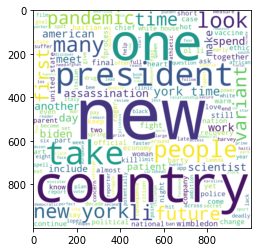

In [44]:
plt.imshow(wc.generate(text), interpolation="bilinear")

In [42]:
def fun_wordcloud(wort):
    wordcloud = WordCloud(width = 1000, height = 1000, random_state=21, max_font_size=110).generate(wort)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

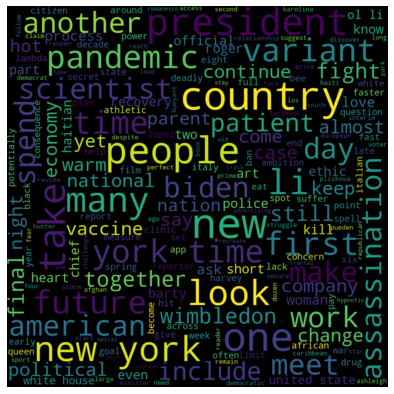

In [43]:
fun_wordcloud(wort=text)